<a href="https://colab.research.google.com/github/Scor999/Data-Science-Numpy-Matplotlib-Scikit-learn/blob/main/Course_project_for_the_course_%22Python_for_Data_Science%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [21]:

# Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Проверка загруженных данных
print(train_df.head())


      Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Pri

In [22]:
# Проверка наличия пропущенных значений
print(train_df.isnull().sum())

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64


In [23]:
# Проверка наличия пропущенных значений
print("Пропущенные значения в тренировочном наборе данных:")
print(train_df.isnull().sum())
print("\nПропущенные значения в тестовом наборе данных:")
print(test_df.isnull().sum())

Пропущенные значения в тренировочном наборе данных:
Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Пропущенные значения в тестовом наборе данных:
Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64


In [24]:
# Заполнение пропущенных значений медианами для числовых признаков
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Price')  # Исключаем столбец 'Price'

train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].median())
test_df[numerical_columns] = test_df[numerical_columns].fillna(train_df[numerical_columns].median())

In [25]:
# Проверка, что пропущенные значения заполнены
print("Проверка пропущенных значений после заполнения:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Проверка пропущенных значений после заполнения:
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64


Число выбросов в столбце Id: 0
Число выбросов в столбце DistrictId: 280
Число выбросов в столбце Rooms: 172
Число выбросов в столбце Square: 242
Число выбросов в столбце LifeSquare: 517
Число выбросов в столбце KitchenSquare: 47
Число выбросов в столбце Floor: 66
Число выбросов в столбце HouseFloor: 49
Число выбросов в столбце HouseYear: 38
Число выбросов в столбце Ecology_1: 61
Число выбросов в столбце Social_1: 0
Число выбросов в столбце Social_2: 176
Число выбросов в столбце Social_3: 862
Число выбросов в столбце Healthcare_1: 3652
Число выбросов в столбце Helthcare_2: 99
Число выбросов в столбце Shops_1: 553
Число выбросов в столбце Price: 583


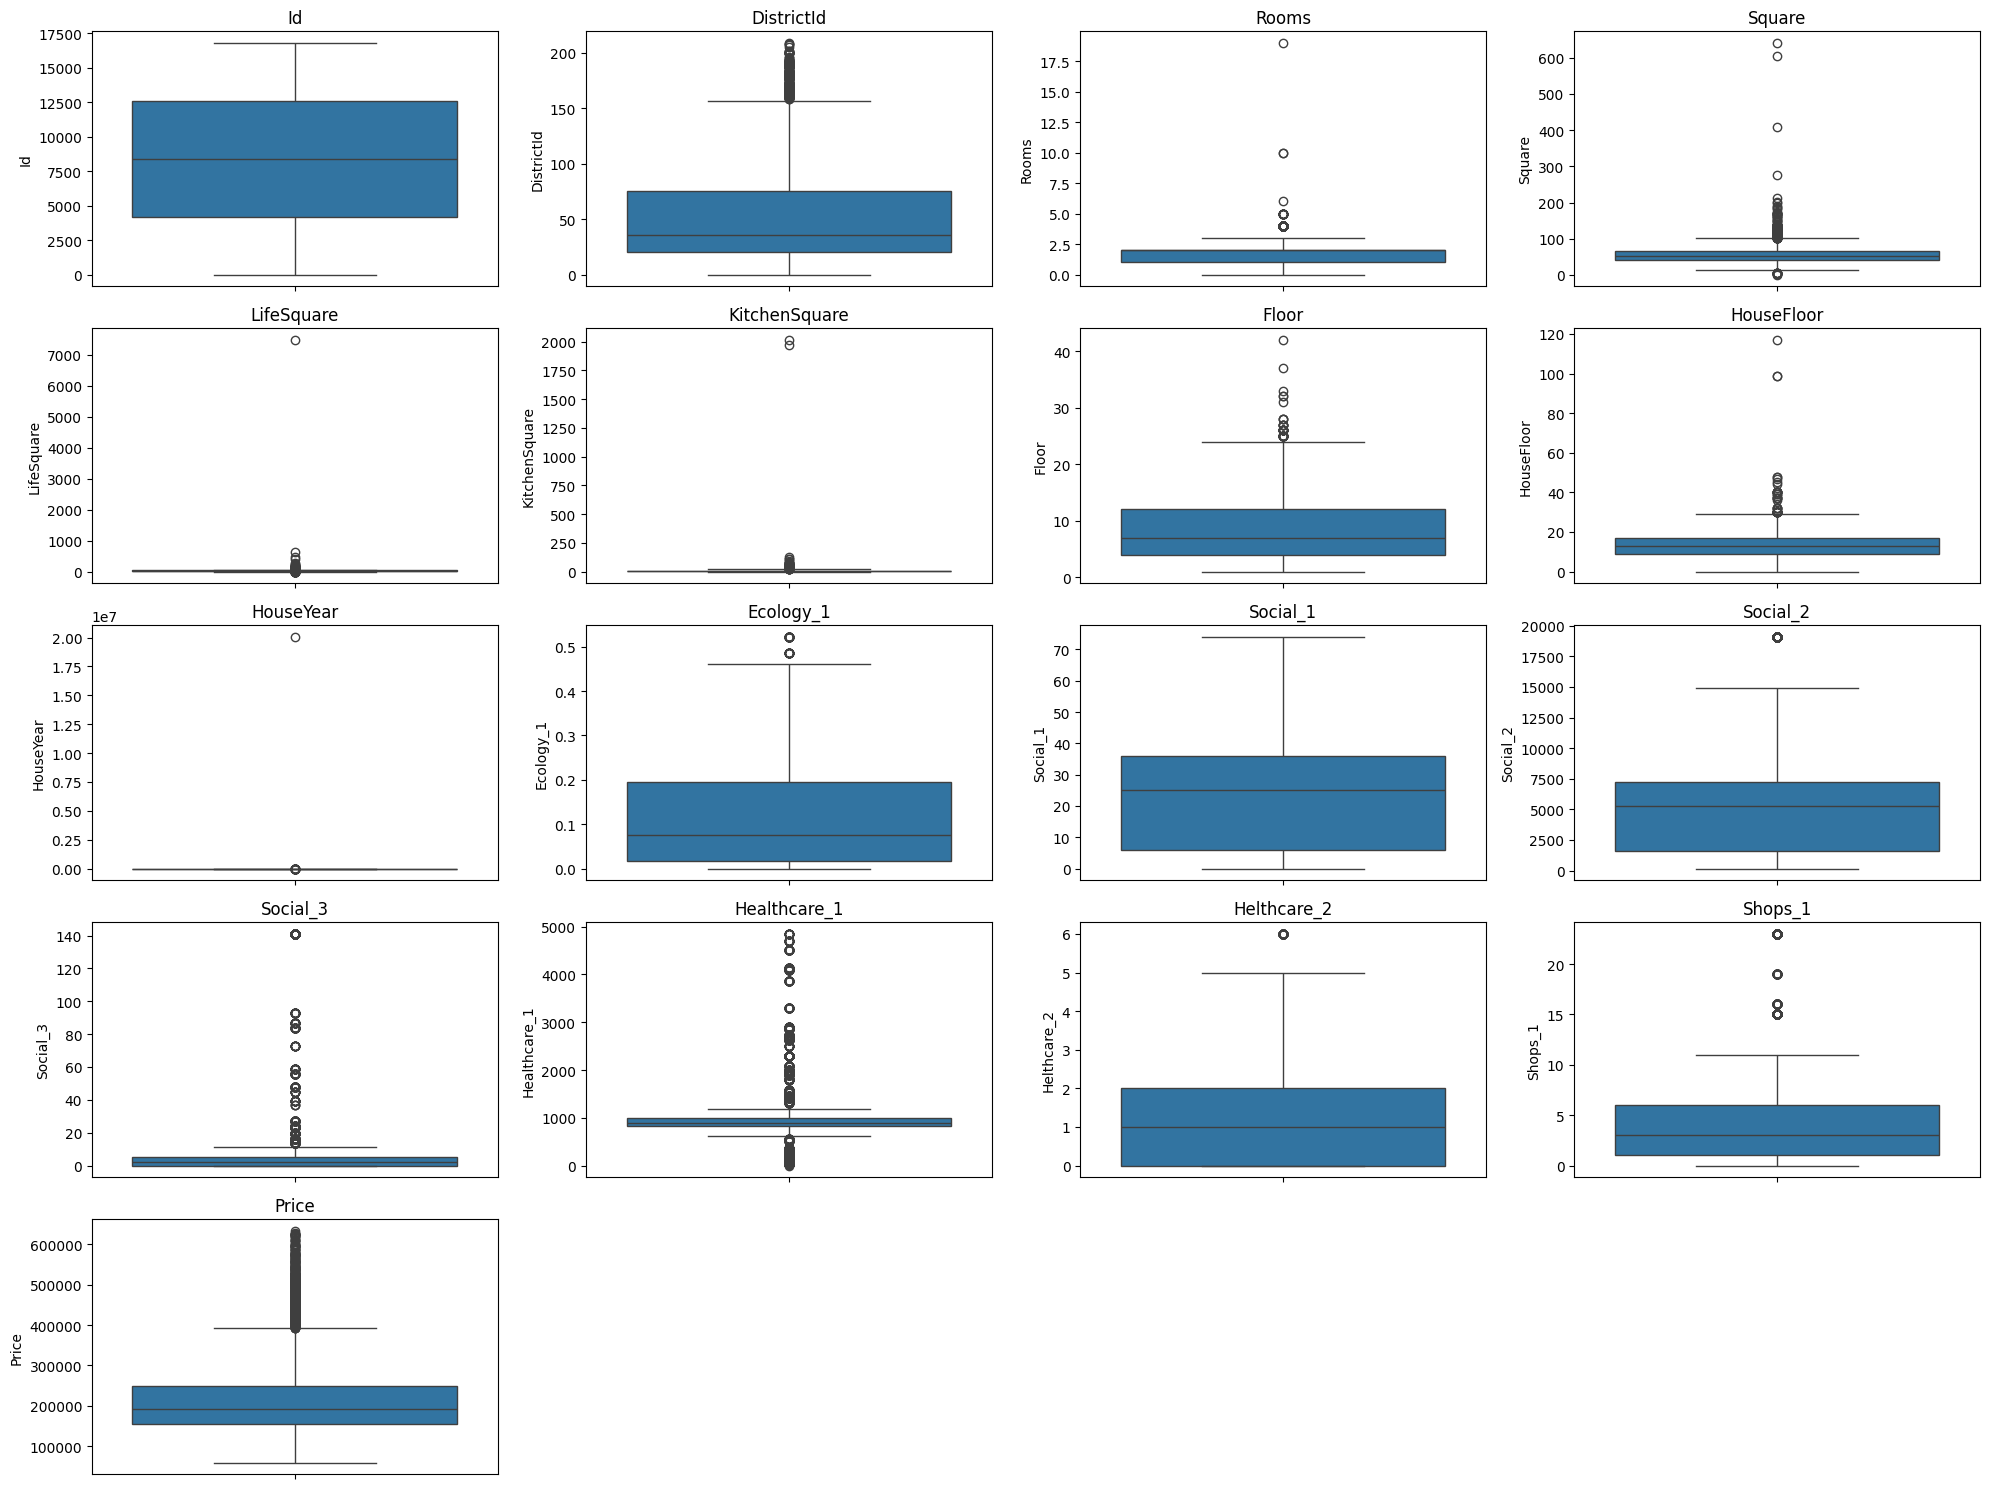

In [26]:
# Функция для выявления выбросов на основе межквартильного размаха (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Выявление выбросов в числовых столбцах
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    outliers = detect_outliers(train_df, column)
    print(f"Число выбросов в столбце {column}: {len(outliers)}")

# Визуализация выбросов с помощью boxplot
plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=train_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [27]:
# Функция для обрезки выбросов на 1-й и 99-й перцентиль
def trim_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Применение функции к числовым признакам
for column in numerical_columns:
    train_df = trim_outliers(train_df, column)

# Проверка формы данных после удаления выбросов
print(f"Размер данных после обрезки выбросов: {train_df.shape}")


Размер данных после обрезки выбросов: (10000, 20)


Число выбросов в столбце Id после обрезки: 0
Число выбросов в столбце DistrictId после обрезки: 280
Число выбросов в столбце Rooms после обрезки: 172
Число выбросов в столбце Square после обрезки: 230
Число выбросов в столбце LifeSquare после обрезки: 481
Число выбросов в столбце KitchenSquare после обрезки: 0
Число выбросов в столбце Floor после обрезки: 0
Число выбросов в столбце HouseFloor после обрезки: 0
Число выбросов в столбце HouseYear после обрезки: 0
Число выбросов в столбце Ecology_1 после обрезки: 0
Число выбросов в столбце Social_1 после обрезки: 0
Число выбросов в столбце Social_2 после обрезки: 176
Число выбросов в столбце Social_3 после обрезки: 862
Число выбросов в столбце Healthcare_1 после обрезки: 3652
Число выбросов в столбце Helthcare_2 после обрезки: 0
Число выбросов в столбце Shops_1 после обрезки: 553
Число выбросов в столбце Price после обрезки: 583


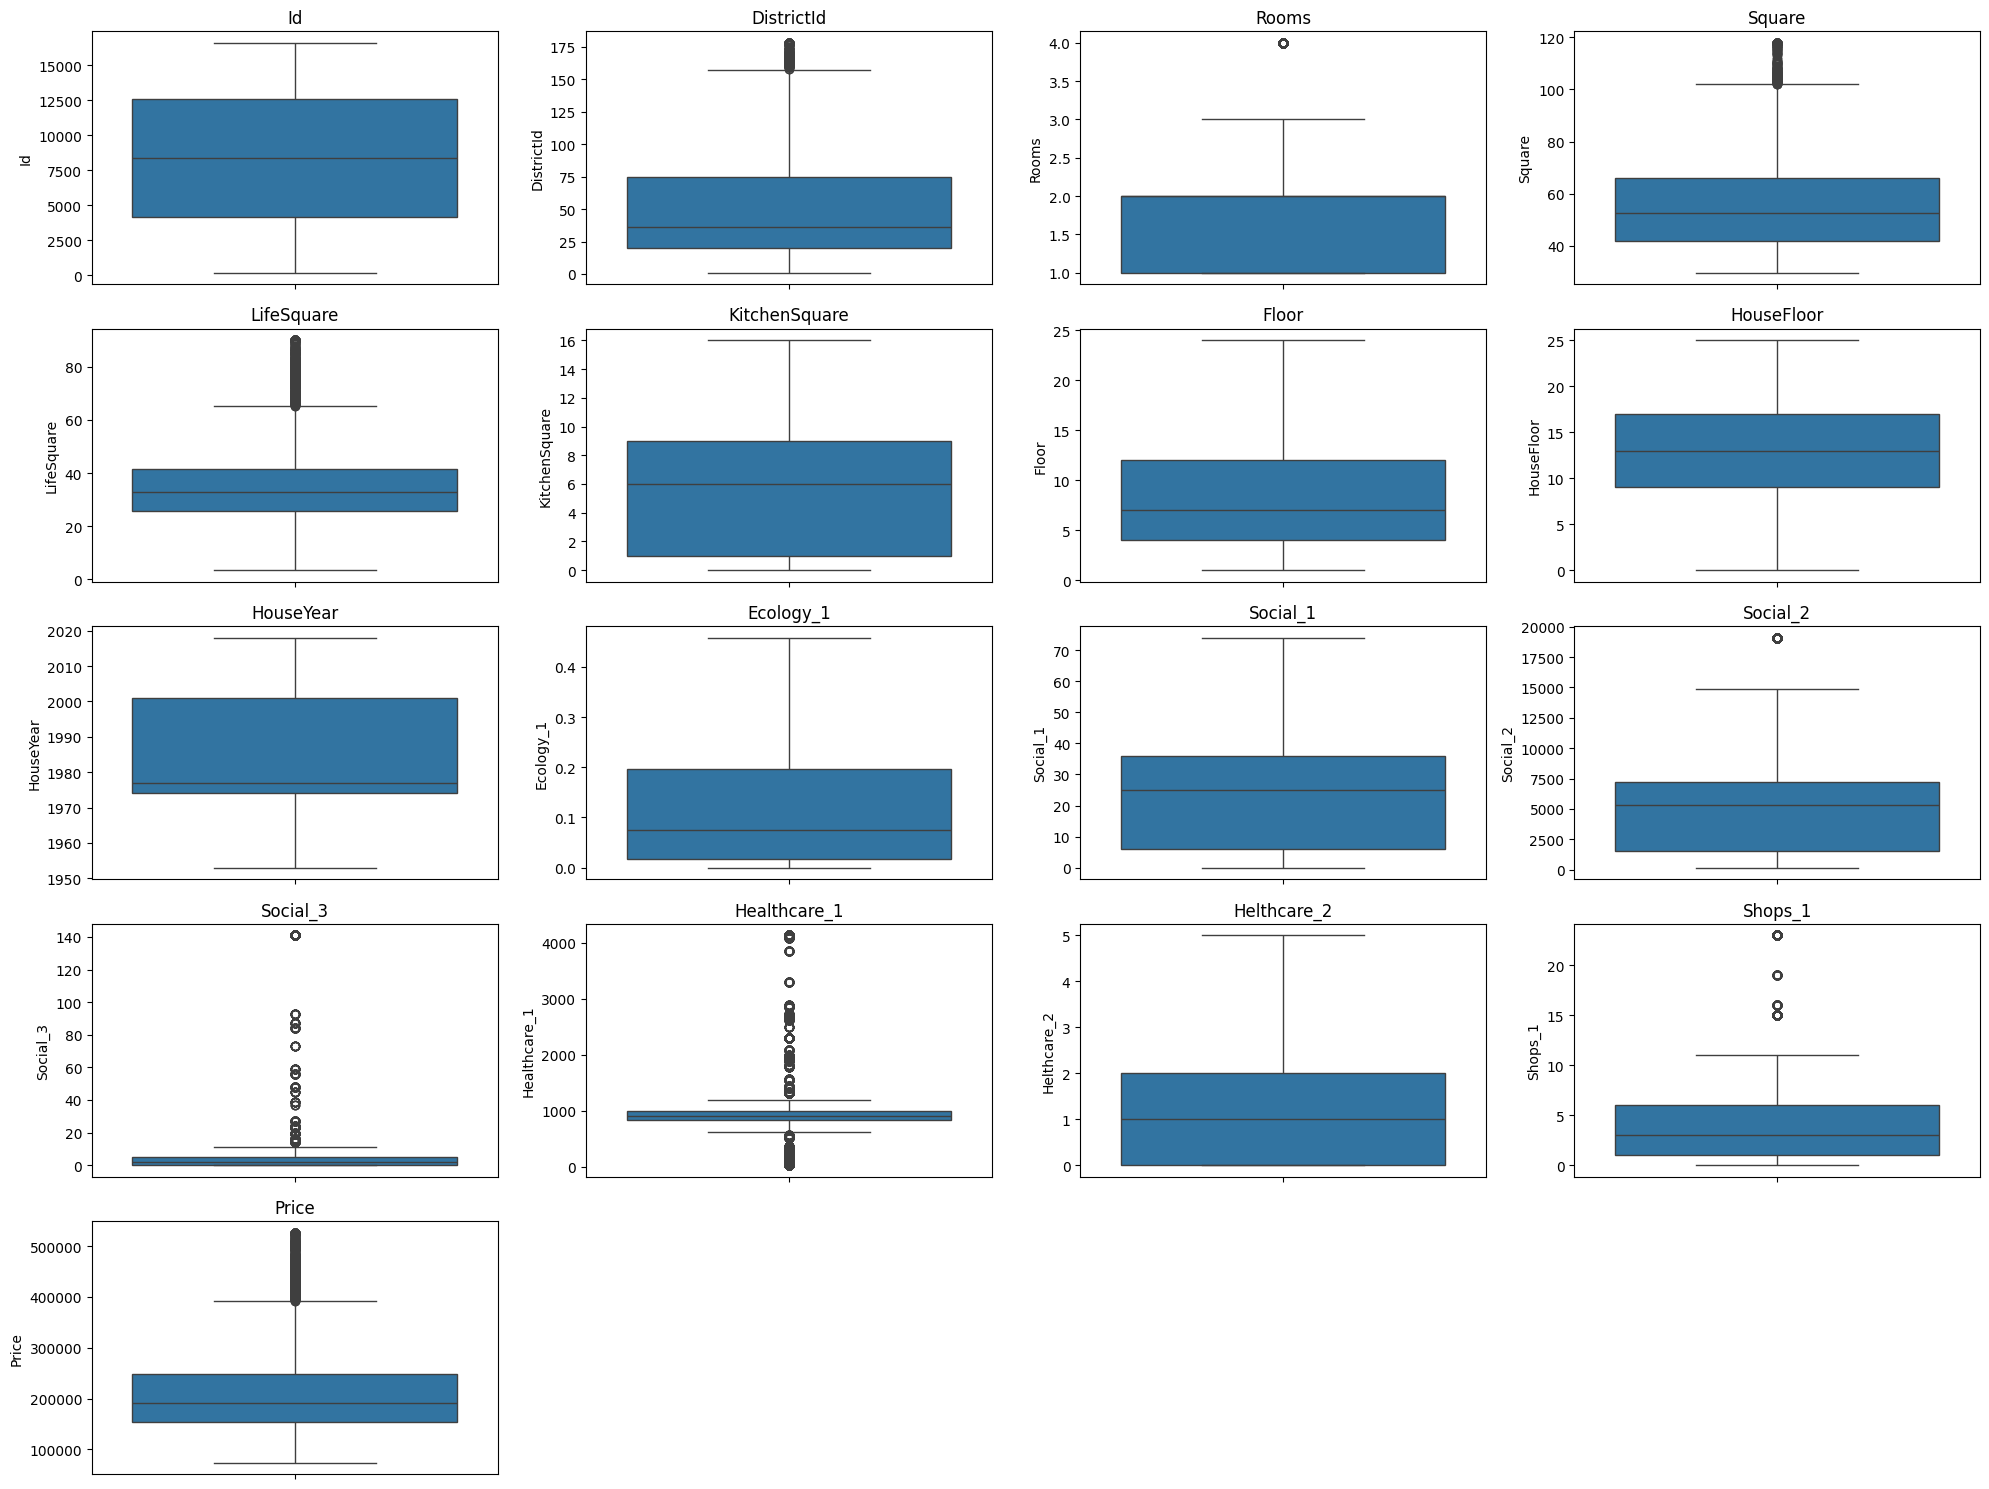

In [28]:
# Повторный анализ на выбросы
for column in numerical_columns:
    outliers = detect_outliers(train_df, column)
    print(f"Число выбросов в столбце {column} после обрезки: {len(outliers)}")

# Повторная визуализация выбросов с помощью boxplot
plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=train_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [29]:
# Преобразование категориальных переменных в числовые
categorical_columns = ['Ecology_2', 'Ecology_3', 'Shops_2']
for col in categorical_columns:
    train_df[col] = train_df[col].astype('category').cat.codes
    test_df[col] = test_df[col].astype('category').cat.codes

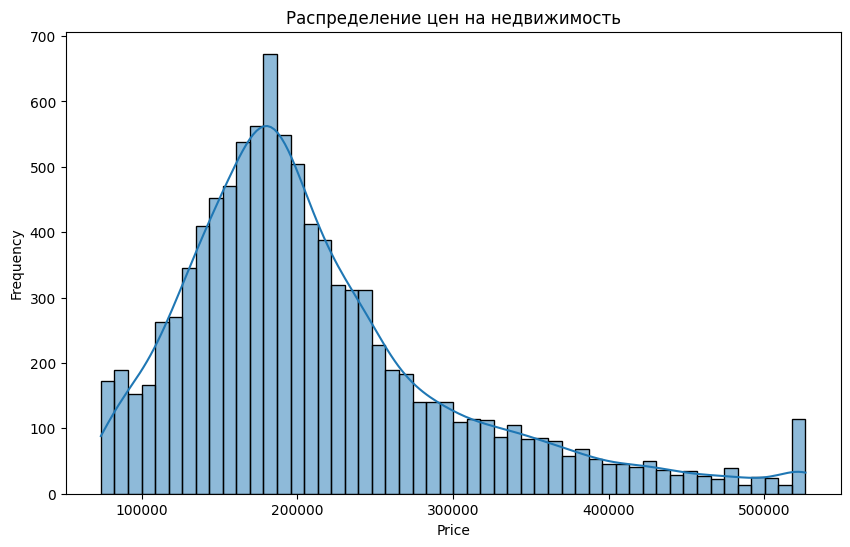

In [30]:
# Распределение целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Price'], kde=True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

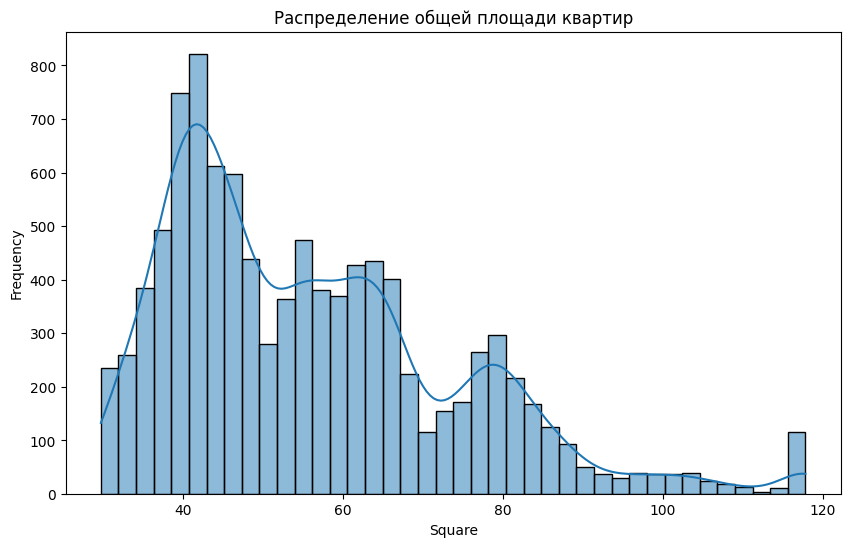

In [31]:
# Распределение общей площади квартир
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Square'], kde=True)
plt.title('Распределение общей площади квартир')
plt.xlabel('Square')
plt.ylabel('Frequency')
plt.show()

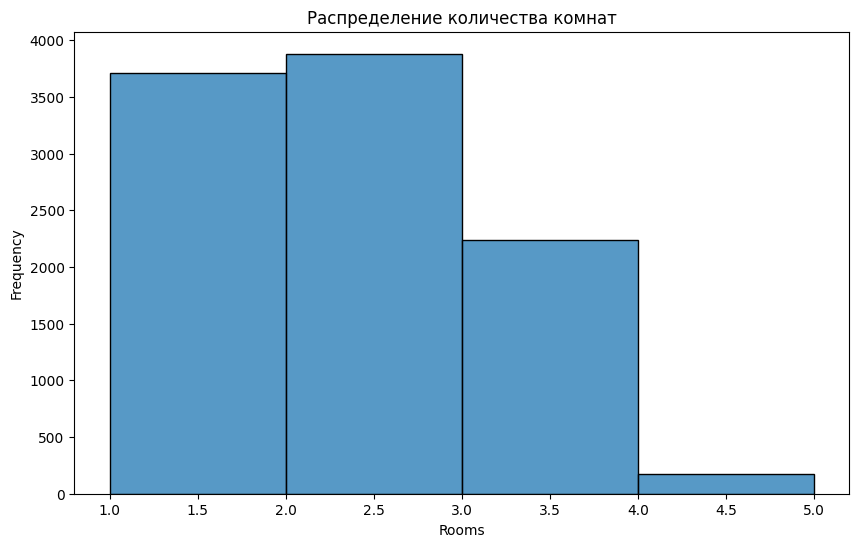

In [32]:
# Распределение количества комнат
plt.figure(figsize=(10, 6))
max_rooms = int(train_df['Rooms'].max())
sns.histplot(train_df['Rooms'], kde=False, bins=range(1, max_rooms + 2))
plt.title('Распределение количества комнат')
plt.xlabel('Rooms')
plt.ylabel('Frequency')
plt.show()


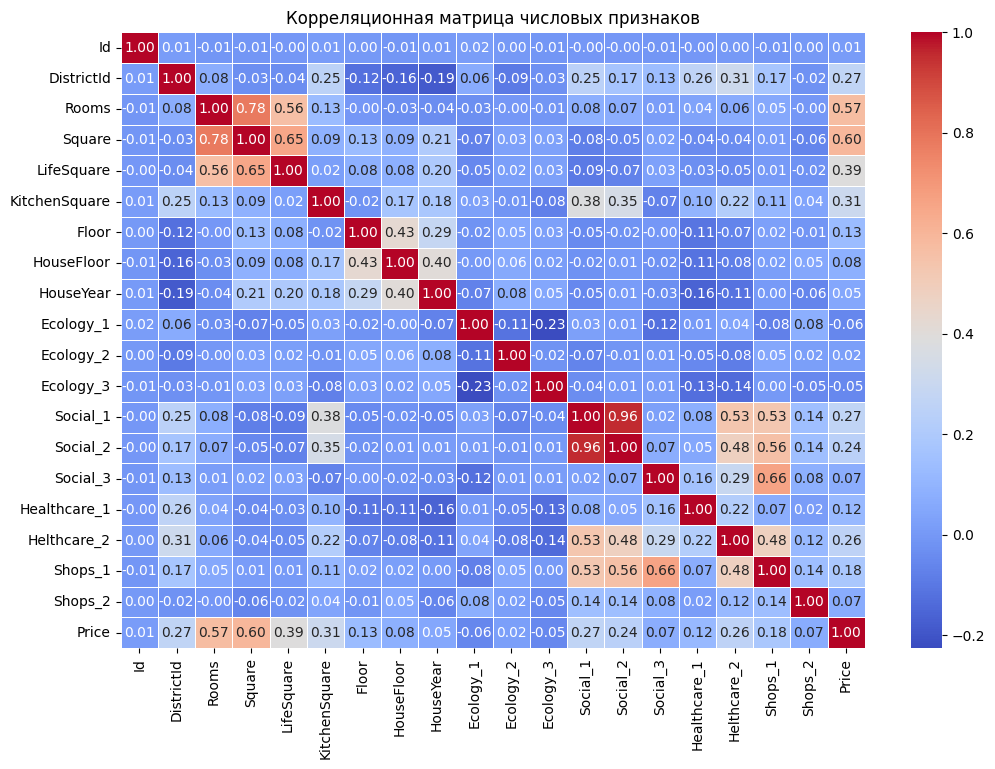

In [33]:
# Построение и визуализация корреляционной матрицы для числовых признаков
plt.figure(figsize=(12, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# Корреляционная матрица позволяет понять, как числовые признаки связаны друг с другом и с целевой переменной.
# Темно-красные и темно-синие ячейки указывают на сильную положительную и отрицательную корреляции соответственно.
# Это помогает выявить важные признаки для модели и определить признаки, которые могут быть исключены из-за высокой корреляции.

In [34]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = train_df.drop(['Price', 'Id'], axis=1)
y = train_df['Price']

# Разделение данных на тренировочную и валидационную выборки
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Обучение модели RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred = model.predict(X_valid)

# Оценка модели
r2 = r2_score(y_valid, y_pred)
print(f'R² на валидационной выборке: {r2:.2f}')

R² на валидационной выборке: 0.72


In [36]:
# Подготовка тестовых данных (удаление столбца 'Id')
X_test = test_df.drop(['Id'], axis=1)

# Предсказание на тестовых данных
test_predictions = model.predict(X_test)

# Формирование файла с предсказаниями
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Price': test_predictions})

# Сохранение предсказаний в файл
submission_df.to_csv('ISelivanov_predictions.csv', index=False)
print("Предсказания сохранены в файл Selivanov_predictions.csv")


Предсказания сохранены в файл Selivanov_predictions.csv


In [37]:
# Проверка количества строк в файле с предсказаниями
predictions_df = pd.read_csv('ISelivanov_predictions.csv')
assert len(predictions_df) == 5000, f"В файле должно быть 5000 строк с предсказаниями, но найдено {len(predictions_df)}"
print(f"Файл ISelivanov_predictions.csv содержит 5000 строк с предсказаниями (без учета шапки).")


Файл ISelivanov_predictions.csv содержит 5000 строк с предсказаниями (без учета шапки).


In [38]:
predictions_df.head()

,Id,Price
0,725,163056.252286
1,15856,229928.299836
2,5480,213475.464900
3,15664,344943.207657
4,14275,144960.518098


## Выводы
В этом курсовом проекте была разработана и обучена модель для предсказания цен на недвижимость на основе данных из файла train.csv. Для оценки и тестирования модели использовались данные из файла test.csv. Вот основные этапы работы и выводы, сделанные на их основе:

1. Предобработка данных:  

Были загружены данные из файлов train.csv и test.csv.
Проведена проверка и заполнение пропущенных значений медианами для числовых признаков.  
В данных были обнаружены пропущенные значения в столбцах LifeSquare и Healthcare_1. Пропуски были заполнены медианными значениями соответствующих столбцов, чтобы минимизировать их влияние на модель.  
Были выявлены значительные выбросы в некоторых столбцах, таких как Rooms, Square, LifeSquare, KitchenSquare, Price, и другие. Эти выбросы могли потенциально искажать результаты модели.    
Для обработки выбросов применялась обрезка значений на 1-й и 99-й перцентиль. Это позволило уменьшить количество аномальных значений, сохранив при этом основную часть данных.  
2. Исследовательский анализ данных (EDA):

Построены и проанализированы графики распределения целевой переменной (цены), общей площади квартир и количества комнат.
Вычислена и визуализирована корреляционная матрица для числовых признаков, что позволило понять взаимосвязи между признаками и целевой переменной.
3. Обучение модели:

Данные были разделены на тренировочную и валидационную выборки.
Модель RandomForestRegressor была выбрана для предсказания цен и обучена на тренировочных данных.
Оценка модели на валидационной выборке показала коэффициент детерминации (R²) равный 0.72, что свидетельствует о хорошем качестве предсказания.
4. Предсказание на тестовых данных:

Полученные предсказания на тестовых данных были сохранены в файл Selivanov_predictions.csv.
Проведена проверка на соответствие требуемому количеству строк (5000 предсказаний + 1 шапка).
## Основные выводы
* Качество модели: Модель RandomForestRegressor показала хороший результат с коэффициентом детерминации R² = 0.72 на валидационной выборке. Это свидетельствует о том, что модель достаточно хорошо объясняет вариацию цен на недвижимость.

* Особенности данных: Анализ данных показал, что распределение цен на недвижимость имеет некоторую асимметрию, что может быть связано с наличием дорогих квартир. Количество комнат и общая площадь квартиры также играют значимую роль в определении цены.